In [19]:
library("tidyverse")
library("scales")

In [20]:
mpg%>%head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [30]:
mpg_long= mpg %>%
    mutate(id = row_number())%>% 
    select(displ, year, cyl, cty, hwy, id, drv) %>%
    pivot_longer(-c(id, drv), names_to = "measurement") %>% 
    group_by(measurement) %>%
    mutate(value_scaled = rescale(value))
mpg_long%>%head

id,drv,measurement,value,value_scaled
<int>,<chr>,<chr>,<dbl>,<dbl>
1,f,displ,1.8,0.03703704
1,f,year,1999.0,0.00000000
1,f,cyl,4.0,0.00000000
1,f,cty,18.0,0.34615385
1,f,hwy,29.0,0.53125000
2,f,displ,1.8,0.03703704


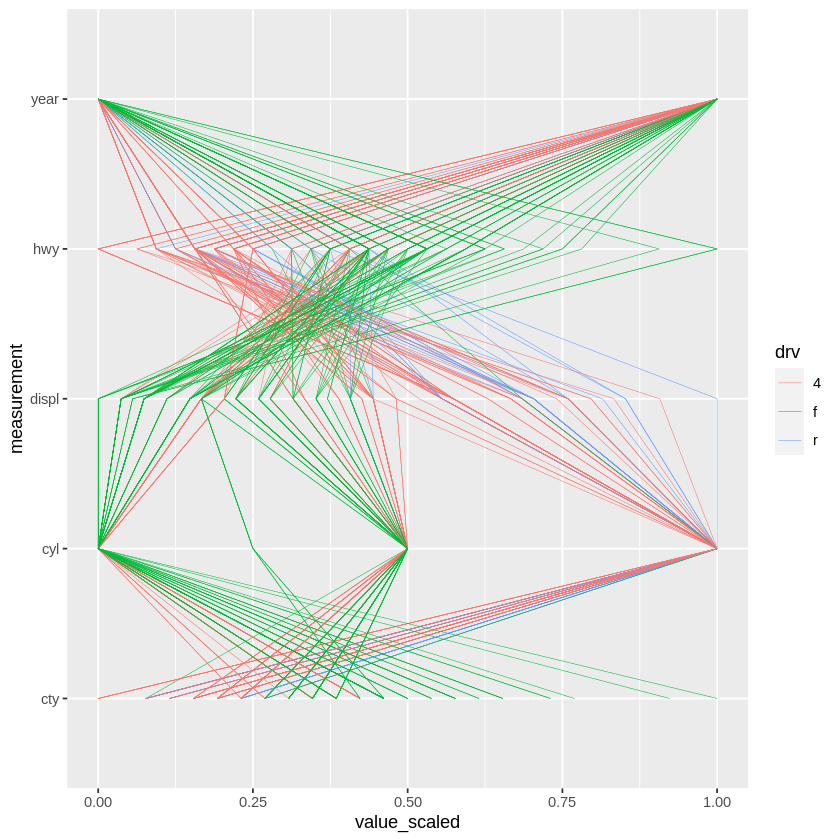

In [31]:
p=ggplot(mpg_long, aes(x=measurement, y=value_scaled, group=id,color=drv))
p=p+geom_line(size=0.15)
p=p+coord_flip()
p